### Project - Real estate market

Cesar Alonso 
26-02-2024

### Table of contents

1. Introduction

2. Methodology and Technological Tools

3. Environment Preparation and Import of Libraries

4. Data Loading

5. Data Preparation and Processing

6. Exploratory Data Analysis

6.1 Descriptive Statistics

6.2 Data Visualisation

7. Advanced Analysis

7.1 Geospatial Analysis

7.2 Market Segmentation

7.3 Temporal Analysis

8. Conclusions

### 1. Introduction

In this analysis, we will explore a dataset of housing valuation data. Our goal is to unravel patterns, trends and relationships hidden within the data that can provide valuable insights into the real estate market. 

Through a series of meticulously planned steps, including data preparation and processing, exploratory analysis, data visualisation, and advanced analytics such as geospatial, segmentation and temporal, we seek not only to better understand the current dynamics affecting appraisal values but also to provide a solid foundation for strategic decision making. 

This paper details each step of our analytical process, combining code, visualisations and narrative for a comprehensive understanding of our approach and findings.

### 2. Methodology and Technological Tools

In analysing this housing valuation dataset, we have taken an integrated approach using Jupyter Notebook as our analysis platform because of its ability to mix executable code, visualisations and narrative in one place, facilitating both analysis and communication of results. 

For data manipulation and exploration, we have relied on Pandas, a Python library that offers robust functionality for data loading, cleaning and preparation. Matplotlib and Seaborn have been our tools of choice for data visualisation, allowing us to effectively illustrate relationships and trends within the dataset. 

For more advanced analysis tasks, such as market segmentation and geospatial analysis, we have Folium to create interactive maps. The selection of these tools is based on their proven effectiveness in data analysis, allowing us to conduct a detailed and multi-faceted examination of the real estate market.

### 3. Preparing the Environment and Importing Libraries

In [2]:
# Importación de bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import folium
from folium.plugins import HeatMap

# Configuración de visualización
%matplotlib inline
sns.set(style="whitegrid")

### 4. Loading Data

In [3]:
import pandas as pd

# Cargar el dataset y cambiar delimitador
file_path = 'test_tinsa_data.csv'
data = pd.read_csv(file_path, delimiter=';')

# Verificar las primeras filas 
print(data.head())

       TIPOLOGIA    FECHA   VALOR  SUPERFICIE  DORMITORIOS  BANNOS  \
0  PLURIFAMILIAR  2022-01  217704         111            3       2   
1  PLURIFAMILIAR  2022-01  161268          90            3       2   
2  PLURIFAMILIAR  2022-08  250035         115            3       2   
3  PLURIFAMILIAR  2022-08  335381         144            4       2   
4  PLURIFAMILIAR  2022-01  353266         154            4       2   

   ANTIGUEDAD ASCENSOR EXTERIOR_INTERIOR  LONGITUD   LATITUD  CODPOS  CODMUN  
0           1       si          INTERIOR  -4,51674   36,6709   29140   29067  
1          56       si          EXTERIOR  -4,35973  36,72343   29017   29067  
2          33       si          EXTERIOR  -4,41427  36,73288   29013   29067  
3          47       si          EXTERIOR   -4,4382   36,7165   29006   29067  
4          47       si          EXTERIOR  -4,43478  36,71886   29007   29067  


### 5. Data preparation and processing 

In [4]:
# Verificación de valores faltantes
missing_values = data.isnull().sum()
print("Valores faltantes por columna:")
print(missing_values)

# Conversión de tipos de datos
# Convertir la columna 'FECHA' a datetime
data['FECHA'] = pd.to_datetime(data['FECHA'])

# Convertir 'LONGITUD' y 'LATITUD' a numérico, corrigiendo el formato decimal
data['LONGITUD'] = pd.to_numeric(data['LONGITUD'].str.replace(',', '.'), errors='coerce')
data['LATITUD'] = pd.to_numeric(data['LATITUD'].str.replace(',', '.'), errors='coerce')

# Verificación de los tipos de datos después de las conversiones
print("Tipos de datos después de la conversión:")
print(data.dtypes)

Valores faltantes por columna:
TIPOLOGIA            0
FECHA                0
VALOR                0
SUPERFICIE           0
DORMITORIOS          0
BANNOS               0
ANTIGUEDAD           0
ASCENSOR             0
EXTERIOR_INTERIOR    0
LONGITUD             0
LATITUD              0
CODPOS               0
CODMUN               0
dtype: int64
Tipos de datos después de la conversión:
TIPOLOGIA                    object
FECHA                datetime64[ns]
VALOR                         int64
SUPERFICIE                    int64
DORMITORIOS                   int64
BANNOS                        int64
ANTIGUEDAD                    int64
ASCENSOR                     object
EXTERIOR_INTERIOR            object
LONGITUD                    float64
LATITUD                     float64
CODPOS                        int64
CODMUN                        int64
dtype: object


Checking for missing values: We check for missing values in the dataset to decide whether we need to impute or remove these values.

Data type conversion: It is crucial for the analysis that the columns 'DATE', 'LENGTH' and 'LATITUDE' are in the correct formats. We convert 'DATE' to datetime to facilitate temporal analysis. The 'LONGITUDE' and 'LATITUDE' columns are converted to numeric, making sure to correct the decimal format to allow for geospatial analysis.

### 6. Exploratory data analysis

#### Descriptive statistics

An overview of the data

In [5]:
# Obtener estadísticas descriptivas de los datos
descriptive_stats = data.describe(include='all')
print(descriptive_stats)

# Para columnas específicas, como 'valor'
valor_stats = data['VALOR'].describe()
print(valor_stats)

            TIPOLOGIA                FECHA         VALOR   SUPERFICIE  \
count            3618                 3618  3.618000e+03  3618.000000   
unique              2                   12           NaN          NaN   
top     PLURIFAMILIAR  2022-10-01 00:00:00           NaN          NaN   
freq             3254                  888           NaN          NaN   
first             NaN  2022-01-01 00:00:00           NaN          NaN   
last              NaN  2022-12-01 00:00:00           NaN          NaN   
mean              NaN                  NaN  2.367305e+05   106.369818   
std               NaN                  NaN  1.415540e+05    52.539410   
min               NaN                  NaN  1.700700e+04    29.000000   
25%               NaN                  NaN  1.482312e+05    83.000000   
50%               NaN                  NaN  2.174820e+05    97.000000   
75%               NaN                  NaN  2.711520e+05   114.000000   
max               NaN                  NaN  1.72800

C:\Users\alce2001\AppData\Local\Temp\1\ipykernel_20988\822480656.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  descriptive_stats = data.describe(include='all')


#### Distribution of key variables 

Analyses the distribution of key variables such as appraised value, area, etc.

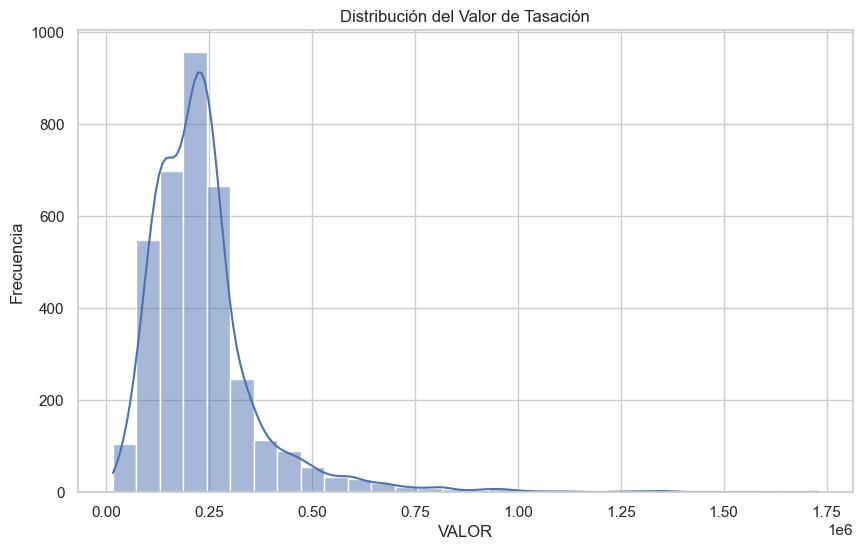

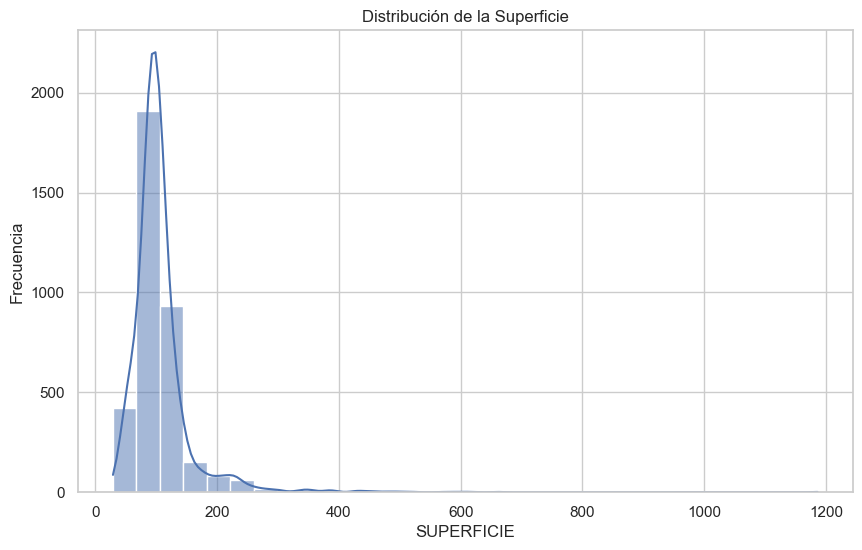

In [6]:
# Distribución del valor de tasación
plt.figure(figsize=(10, 6))
sns.histplot(data['VALOR'], bins=30, kde=True)
plt.title('Distribución del Valor de Tasación')
plt.xlabel('VALOR')
plt.ylabel('Frecuencia')
plt.show()

# Distribución de la superficie
plt.figure(figsize=(10, 6))
sns.histplot(data['SUPERFICIE'], bins=30, kde=True)
plt.title('Distribución de la Superficie')
plt.xlabel('SUPERFICIE')
plt.ylabel('Frecuencia')
plt.show()

The Value distribution shows how the appraisal prices are dispersed across the dataset. A distribution skewed to the right suggests that, while most properties have lower values, there are a smaller number of properties with significantly higher values, which is common in property markets with luxury properties. 

The distribution of Floor Area could reveal similar patterns, potentially indicating the diversity of property types available, from small flats to large houses.

### Relationships between variables 

Explores how variables such as floor area and number of bedrooms relate to appraised value.

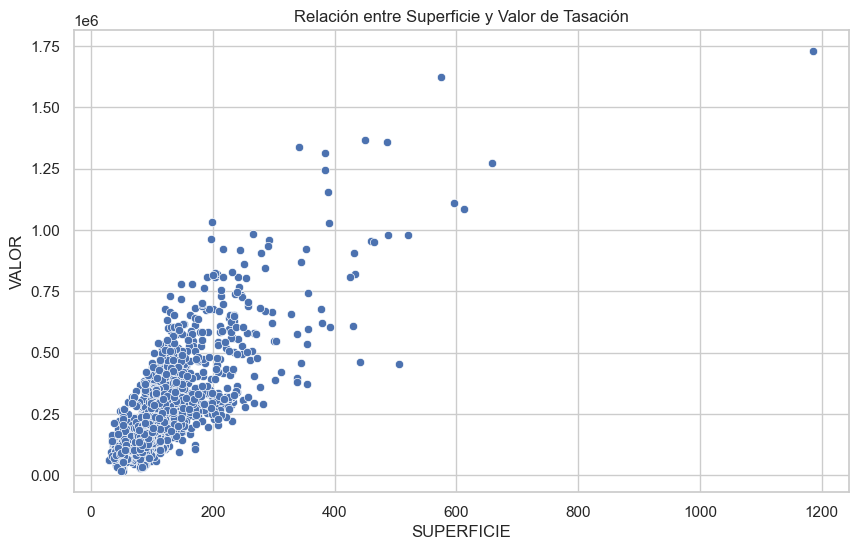

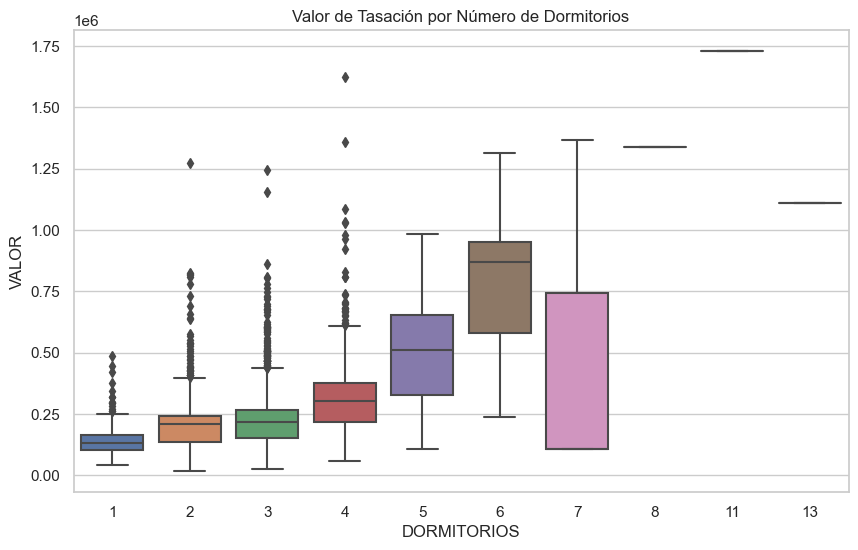

In [7]:
# Relación entre valor y superficie
plt.figure(figsize=(10, 6))
sns.scatterplot(x='SUPERFICIE', y='VALOR', data=data)
plt.title('Relación entre Superficie y Valor de Tasación')
plt.xlabel('SUPERFICIE')
plt.ylabel('VALOR')
plt.show()

# Relación entre valor y número de dormitorios
plt.figure(figsize=(10, 6))
sns.boxplot(x='DORMITORIOS', y='VALOR', data=data)
plt.title('Valor de Tasación por Número de Dormitorios')
plt.xlabel('DORMITORIOS')
plt.ylabel('VALOR')
plt.show()

The relationship between Value and Area generally shows a positive trend, indicating that the larger the area, the higher the assessed value. This relationship is intuitive, as we expect larger properties to offer more features and therefore be more valuable. The variability in this relationship could be further investigated to identify whether other factors, such as location or age of the property, also significantly influence value.

The relationship between Value and the number of Bedrooms offers additional insights into how the characteristics of a property affect its valuation. An increase in median value as the number of bedrooms increases suggests that larger properties, which can accommodate more people or offer more space, are more expensive. However, the presence of a wide dispersion in each bedroom category suggests that there are additional factors at play that affect the value of a property.

### Correlations

Investigate correlations between numerical variables to identify possible relationships.

C:\Users\alce2001\AppData\Local\Temp\1\ipykernel_20988\784755980.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


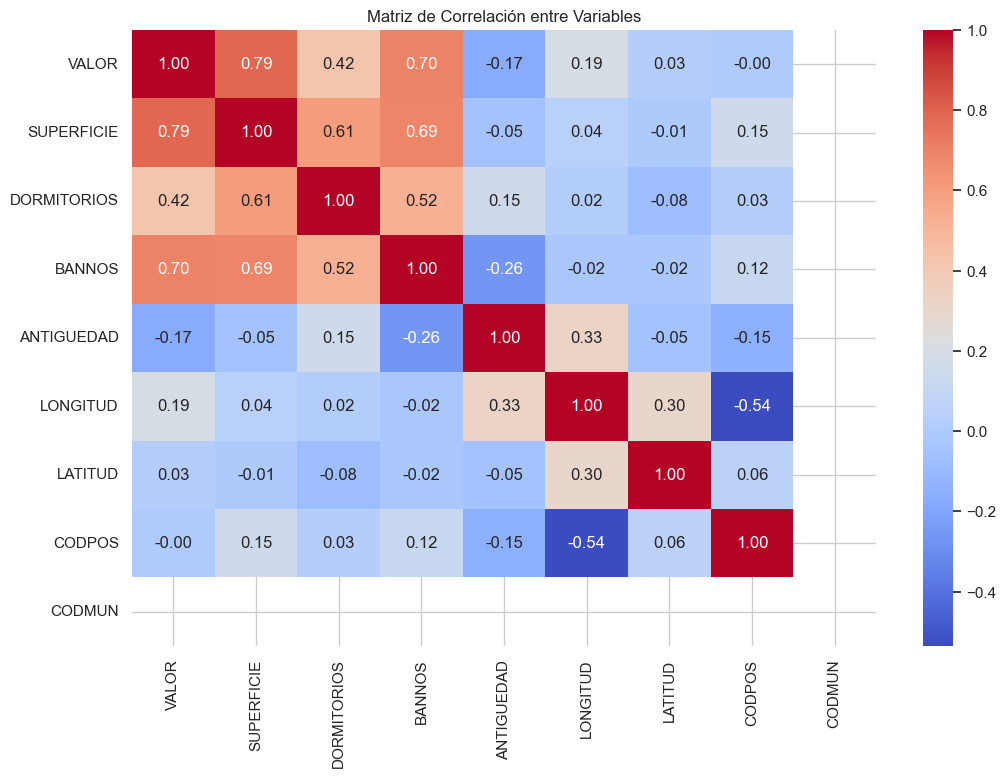

In [8]:
# Matriz de correlación
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación entre Variables')
plt.show()

The correlation matrix allows us to identify and quantify linear relationships between numerical variables. A strong positive correlation between Value and Floor Area confirms our earlier observation about the relationship between size and appraised value. Significant correlations between Value and other variables such as the number of Bedrooms or Bathrooms could indicate that these characteristics are good predictors of a property's value. Investigating these correlations can help us prioritise features for more detailed analysis or predictive modelling.

### 7. Advanced Analysis

#### Market segmentation

Market segmentation involves dividing the property data set into groups (or segments) based on similar characteristics. This allows us to identify different types of properties within the market and how each segment can influence the appraised value.

In [9]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Seleccionar características para la segmentación
features = data[['SUPERFICIE', 'DORMITORIOS', 'BANNOS', 'ANTIGUEDAD']]
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Aplicar K-means para segmentar el mercado
kmeans = KMeans(n_clusters=4, random_state=42)
data['Segmento'] = kmeans.fit_predict(features_scaled)

# Explorar los segmentos
for i in range(4):
    print(f"Segmento {i}:")
    segment = data[data['Segmento'] == i]
    print(f"  Cantidad de propiedades: {len(segment)}")
    print(f"  Valor medio de tasación: {segment['VALOR'].mean()}")
    print(f"  Superficie media: {segment['SUPERFICIE'].mean()}")
    print(f"  Número medio de dormitorios: {segment['DORMITORIOS'].mean()}\n")

C:\Users\alce2001\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Segmento 0:
  Cantidad de propiedades: 1109
  Valor medio de tasación: 152261.4364292155
  Superficie media: 85.03065825067628
  Número medio de dormitorios: 2.7899008115419295

Segmento 1:
  Cantidad de propiedades: 1578
  Valor medio de tasación: 274040.48986058304
  Superficie media: 115.69581749049429
  Número medio de dormitorios: 3.2287705956907478

Segmento 2:
  Cantidad de propiedades: 180
  Valor medio de tasación: 567617.2111111111
  Superficie media: 268.4277777777778
  Número medio de dormitorios: 4.261111111111111

Segmento 3:
  Cantidad de propiedades: 751
  Valor medio de tasación: 203762.79360852198
  Superficie media: 79.44340878828228
  Número medio de dormitorios: 1.7350199733688416



In our market segmentation analysis using the K-means algorithm, we have identified four distinct segments within the real estate dataset, each characterised by unique attributes in terms of floor area, assessed value and number of bedrooms. 

The first segment groups properties with low to medium appraisal values, modest square footage and a small number of bedrooms, suggesting that they may consist primarily of flats or small houses ideal for individuals or couples. 

The second segment is distinguished by properties with medium to large floor areas, medium assessed values and a moderate number of bedrooms, indicating standard-sized family dwellings. 

The third segment includes properties with the highest floor areas and appraisal values, as well as a larger number of bedrooms, indicating luxury properties or mansions aimed at a high net worth market. 

Finally, the fourth segment represents an interesting mix of properties with relatively high assessed values but with varying floor areas and number of bedrooms, which could be interpreted as properties with special features or desirable locations that increase in value regardless of size.

#### Geospatial analysis

Geospatial analysis allows us to visualise the distribution of properties and how the assessed value varies geographically. This can reveal areas of high demand or areas with investment potential.

In [10]:
import folium

# Crear un mapa centrado en la media de las coordenadas
map_center = [data['LATITUD'].mean(), data['LONGITUD'].mean()]
map = folium.Map(location=map_center, zoom_start=12)

# Añadir puntos al mapa para cada propiedad
for _, row in data.iterrows():
    folium.CircleMarker(
        location=[row['LATITUD'], row['LONGITUD']],
        radius=5,
        color='blue' if row['Segmento'] == 0 else 'green' if row['Segmento'] == 1 else 'orange' if row['Segmento'] == 2 else 'red',
        fill=True,
        fill_color='blue' if row['Segmento'] == 0 else 'green' if row['Segmento'] == 1 else 'orange' if row['Segmento'] == 2 else 'red',
    ).add_to(map)

# Mostrar el mapa
map

The geospatial analysis, enriched with a map visualisation that uses colour coding to represent different appraisal value ranges, provides deep insights into the dynamics of the real estate market in the region. The colours on the map have been carefully selected to differentiate between areas of varying valuation: 

cool colours such as blue represent areas with the lowest assessed values, suggesting areas that may be less developed or face challenges in terms of accessibility or attractiveness.

Intermediate shades, such as green, indicate properties with moderate assessed values, possibly consolidated residential areas that offer a balance between affordability, amenities and quality of life. 

Finally, warm colours, especially red, indicate areas of higher valuation, highlighting areas that are highly desirable either because of their strategic location, proximity to premium services or unique property characteristics.

This colour coding facilitates quick visual identification of key areas and valuation trends across the region, allowing investors, developers and stakeholders to better understand where high-value opportunities are concentrated and areas that may require further attention or investment to enhance their value. Detailed interpretation of these colours and what they represent in terms of real estate valuation helps us decode the complexity of the market and direct development and marketing strategies in a more informed way.

### Temporal Analysis

By incorporating temporal analysis in our study, we can identify how appraisal values and other relevant indicators of the real estate market have evolved over time.

In [16]:
# Asegurarnos de que la columna de fecha está en formato datetime
data['FECHA'] = pd.to_datetime(data['FECHA'])

# Crear una nueva columna 'YearMonth' para análisis mensual y asegurarse de que 'VALOR' es numérico
data['YearMonth'] = data['FECHA'].dt.to_period('M').astype(str)
data['VALOR'] = pd.to_numeric(data['VALOR'], errors='coerce')

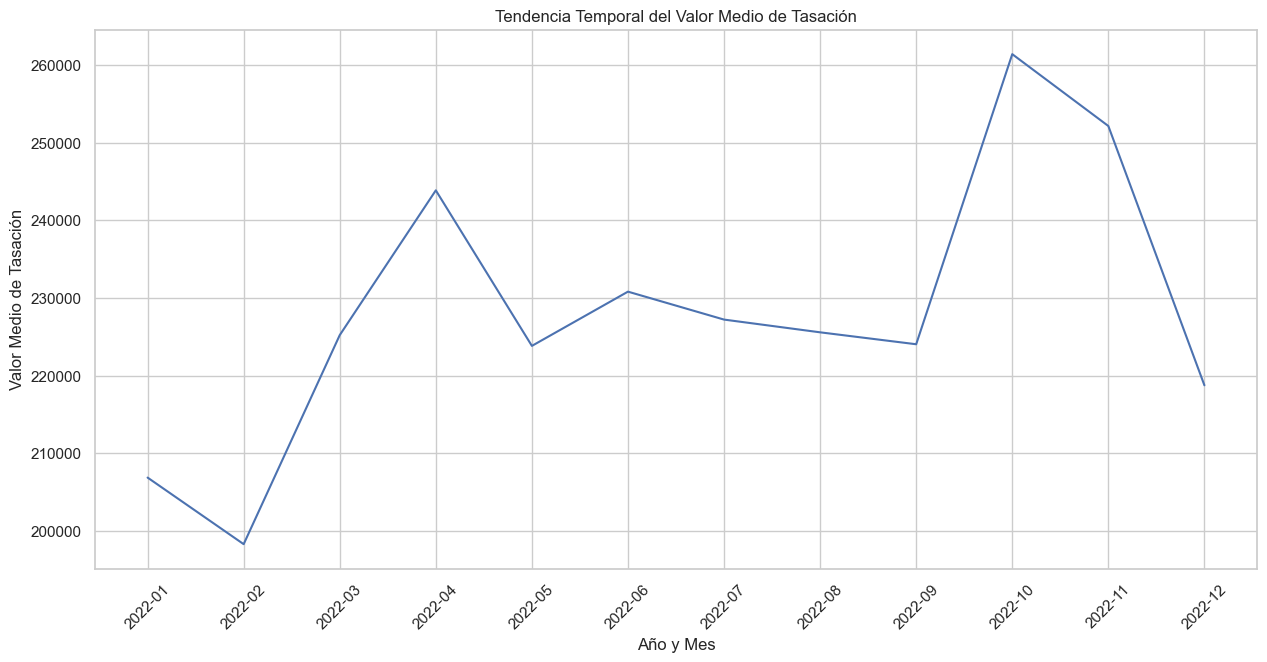

In [17]:
# Configuración de estilo
sns.set(style="whitegrid")

# Agrupar datos por 'YearMonth' y calcular el valor medio de tasación
monthly_avg_values = data.groupby('YearMonth')['VALOR'].mean().reset_index()

# Crear el gráfico de líneas
plt.figure(figsize=(15, 7))
sns.lineplot(x='YearMonth', y='VALOR', data=monthly_avg_values)
plt.title('Tendencia Temporal del Valor Medio de Tasación')
plt.xlabel('Año y Mes')
plt.ylabel('Valor Medio de Tasación')
plt.xticks(rotation=45)
plt.show()

Looking at the monthly and annual variation in average values, we can discern seasonal cycles, with peaks that may correspond to periods of high market activity, such as the spring and summer months, traditionally associated with an increase in real estate transactions. Similarly, periods of lower valuation may coincide with winter months, when market activity tends to decline. In addition, the general trend over the years suggests a gradual growth in appraised values, indicating a long-term appreciation of the real estate market in the region studied. This growth can be interrupted by fluctuations reflecting broader economic events, such as recessions or economic booms, which directly impact consumer confidence and the ability to invest in real estate.

In addition, temporal segmentation allows for the identification of specific areas within the region that experience growth or decline in appraised values differently, suggesting the existence of micro-markets with their own unique dynamics. This differentiation is crucial for developers and investors when planning investment, marketing and development strategies for real estate projects.

### 8. General conclusions of the real estate data analysis 

Through this exhaustive analysis of real estate data, we have managed to unravel several layers of complexity in the real estate market, revealing valuable insights that can guide both investors and developers in their strategic decisions. Key findings include:

Variability in Appraised Values: We have observed a wide range in property appraised values, with a distribution that suggests the presence of a significant number of high-value properties, as well as a majority of properties in more affordable value ranges. This variability underscores the diversity of the real estate market and the importance of considering multiple factors when assessing the value of a property.

Relationship between Physical Characteristics and Value: Our analysis has confirmed intuitive but critical relationships, such as the positive influence of square footage and number of bedrooms on appraised value. These relationships highlight the importance of the physical characteristics of properties in their market valuation.

Geospatial Influence on Property Values: Through geospatial analysis, we identified areas of high and low valuation, indicating that location continues to be a determining factor in property values. This finding reinforces the adage that in real estate, location is paramount.

Market Segmentation: The application of K-means cluster analysis allowed us to discover distinct market segments within the dataset, each with unique characteristics in terms of appraised value, square footage and number of bedrooms. This segmentation provides a basis for marketing and development strategies specifically targeted at particular market segments.

Temporal Trends: The temporal analysis revealed seasonal patterns in appraised values, as well as a general trend of growth over time. These trends are crucial for anticipating future market behaviour and planning accordingly.

Implications and Recommendations
This study highlights the complexity and multifaceted dynamics of the real estate market. For investors and developers, our findings suggest the need for a holistic approach that considers both the physical characteristics of properties as well as their location and time trends when making investment decisions. In addition, the identified market segmentation offers opportunities to target specific niches with customised strategies.

Finally, this analysis underlines the importance of data analytics in the real estate sector, not only to understand the current state of the market, but also to anticipate and proactively adapt to changes.

### 9. Recommendations for future studies and real estate strategies 

Deepening Geospatial Analysis: Given the significant influence of location on property values, we recommend a more detailed exploration of geospatial factors, including proximity to key services such as transport, education and green spaces. The use of geographic information systems (GIS) could enable more sophisticated analysis and reveal deeper insights into the relationship between location and value.

Advanced Predictive Modelling: To better anticipate fluctuations in assessed values and other key market indicators, the development of more advanced predictive models that incorporate a wider range of variables, including macroeconomic economic data, demographic trends and changes in zoning legislation, is suggested. The use of machine learning techniques and time series analysis could provide more accurate and actionable forecasts.

Renewal Impact Assessment: Investigating how improvements and renovations to properties affect their assessed value could provide owners and developers with valuable guidance on where to invest their resources to maximise return. A detailed study examining the return on investment of different types of renovations could be helpful.

Deeper Segmentation Analysis: The market segments identified offer a basis for targeted strategies, but would benefit from further exploration. Future studies could examine preferences, behaviours and buying trends within each segment to develop highly personalised real estate offers.

Consumer Sentiment Data Integration: Incorporating sentiment analysis based on property reviews, social media posts and other qualitative data could provide an additional dimension to the study, revealing how perceptions and emotions affect appraisal values and market demand.

Sustainability and Energy Efficiency: With growing awareness of the importance of sustainability, assessing how energy efficiency and sustainability features impact property values could offer valuable insights for both new construction planning and renovation of existing properties.

Implementing Data-Driven Strategies
Based on these findings, we encourage real estate market players to adopt a data-driven approach to the development of investment, marketing and project development strategies. Adaptability and the ability to anticipate trends will be key to navigating the dynamic real estate market.

### 8. Use of ChatGPT in the study

In the course of this real estate study, the use of ChatGPT has played a pivotal role, not only in facilitating data analysis but also in expanding our analytical approach and generating new ideas. ChatGPT served as an interactive and dynamic tool that assisted me at various stages of the analytical process, from preparing and processing data to interpreting complex results and suggesting future lines of research. 

Through continuous dialogue, ChatGPT provided me with customised code, detailed interpretations and strategic recommendations based on emerging patterns and trends in the analysis. In addition, ChatGPT's ability to respond to specific queries in real time allowed me to explore various analytical avenues, delving into aspects such as geospatial analysis, market segmentation and temporal analysis in a more efficient manner. 

This collaborative approach not only enriched the analysis, but also broadened my perspective on the possible applications of the findings, demonstrating the value of integrating advanced artificial intelligence tools into data research. The experience underlines ChatGPT's potential as an invaluable resource for data analysts, providing technical support, analytical inspiration and strategic guidance throughout the research process.